todo: add boundaries for x and t ranges. 0-80, 0-1600

In [1]:
# load libraries
import tonic
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from tqdm import trange

In [2]:
params = {} 
params["dataset_directory"] = "/raw-spiking-heidleberg-digits-80input/"
params["verbose"] = False

x_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_x_spikes.npy", allow_pickle = True)
y_train = np.load("/its/home/ts468/PhD/Intel-Neuromorphic-Research-Project/raw-spiking-heidleberg-digits-80input/training_y_spikes.npy", allow_pickle = True)
training_details = pd.read_csv(os.getcwd() + params.get("dataset_directory") + "training_details.csv")

speakers_list = np.array(list(training_details.loc[:, "Speaker"]))

In [3]:
# get a single sample
print(f"y data      : {y_train[0]}")
print(f"x data      : {x_train[0]}")
print(f"speaker     :{speakers_list[0]}")

y data      : 14
x data      : [(67,  48, 1) (77,  52, 1) (61,  53, 1) (76,  55, 1) (78,  55, 1)
 (75,  56, 1) (62,  57, 1) (74,  60, 1) (72,  62, 1) (68,  63, 1)
 (70,  65, 1) (71,  65, 1) (69,  68, 1) (73,  71, 1) (44,  73, 1)
 (66,  73, 1) (63,  77, 1) (53,  87, 1) (52,  89, 1) (61,  92, 1)
 (62,  93, 1) (51,  99, 1) (54, 103, 1) ( 5, 104, 1) ( 6, 105, 1)
 (12, 106, 1) (50, 106, 1) (11, 107, 1) (49, 107, 1) ( 7, 108, 1)
 ( 4, 109, 1) (67, 111, 1) (13, 112, 1) (47, 113, 1) (45, 115, 1)
 (10, 116, 1) (55, 116, 1) (68, 116, 1) (46, 117, 1) (48, 117, 1)
 (60, 121, 1) (52, 123, 1) (53, 123, 1) ( 9, 124, 1) (65, 124, 1)
 (56, 129, 1) (69, 129, 1) (63, 130, 1) (70, 130, 1) ( 5, 131, 1)
 (44, 132, 1) (11, 133, 1) ( 6, 134, 1) (12, 134, 1) (66, 134, 1)
 (62, 136, 1) (61, 137, 1) (64, 137, 1) ( 4, 139, 1) (54, 139, 1)
 (59, 140, 1) (10, 144, 1) (47, 147, 1) (67, 150, 1) (49, 151, 1)
 (13, 152, 1) (48, 155, 1) (50, 156, 1) ( 5, 157, 1) (58, 157, 1)
 (68, 158, 1) (11, 159, 1) (57, 159, 1) ( 7, 

In [4]:
speaker = 0
digit = 2

print(f"digit: {y_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)]}")
print(f"speaker: {speakers_list[np.where(speakers_list == speaker)]}")

digit: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2]
speaker: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [5]:
# average digit of each speaker
# speakers (11) with a sub array of digits (20)

average_speaker_digit = [[] for _ in range(max(speakers_list) + 1)]

for speaker in average_speaker_digit:
    for digit in np.unique(y_train):
        speaker.append([digit])
    

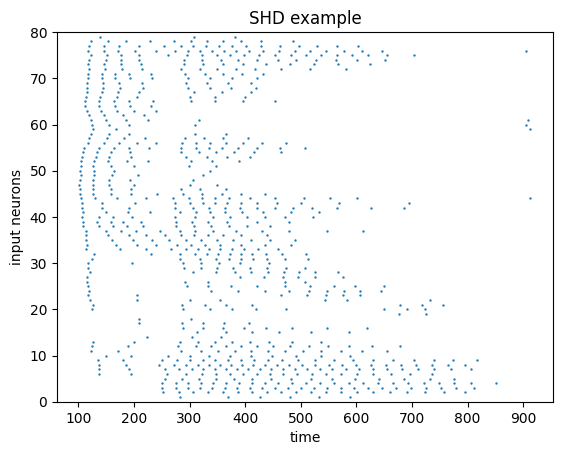

In [6]:
# create single digit x from speaker y

speaker = 1
digit = 2
index = 0

plt.scatter(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]["t"],
            x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]["x"],
            s = 0.5)

plt.ylim(0, 80)
plt.ylabel("input neurons")
plt.xlabel("time")
plt.title("SHD example")
plt.show()

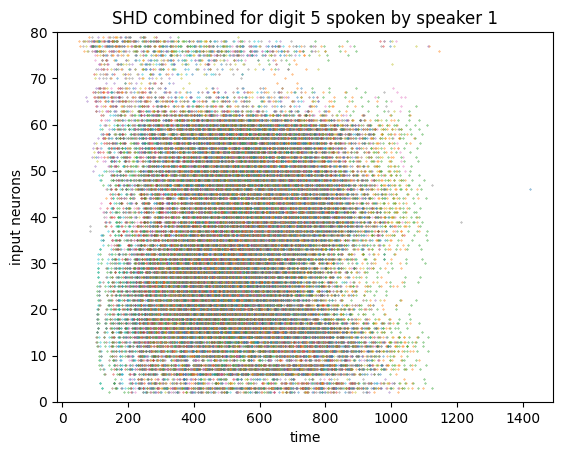

In [7]:
# display combined digit x for speaker y

speaker = 1
digit = 5

for index in range(y_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)].shape[0]): 
    # iterating through all digit examples for specified speaker
    plt.scatter(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]["t"],
                x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]["x"],
                s = 0.1)

plt.ylim(0, 80)
plt.ylabel("input neurons")
plt.xlabel("time")
plt.title(f"SHD combined for digit {digit} spoken by speaker {speaker}")
plt.show()

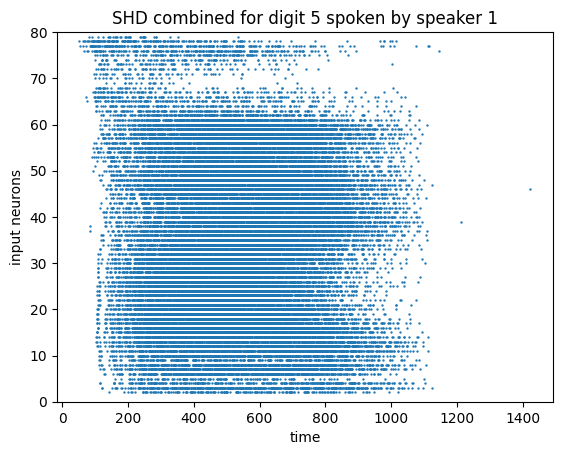

In [8]:
# combined digit x for speaker y

speaker = 1
digit = 5

x, t = [], []
combined_images = []

for index in range(y_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)].shape[0]): 
    # iterating through all digit examples for specified speaker
    t += list(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]["t"])
    x += list(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]["x"])

# Create the structured array
spike_data = np.zeros(len(t), dtype=[('x', 'i1'), ('t', '<i2'), ('p', 'i1')])

# Populate the structured array
spike_data['t'] = np.array(t)[np.argsort(t)]
spike_data['x'] = np.array(x)[np.argsort(t)]
spike_data['p'] = 1

plt.scatter(spike_data["t"],
            spike_data["x"],
            s = 0.5)

plt.ylim(0, 80)
plt.ylabel("input neurons")
plt.xlabel("time")
plt.title(f"SHD combined for digit {digit} spoken by speaker {speaker}")
plt.show()

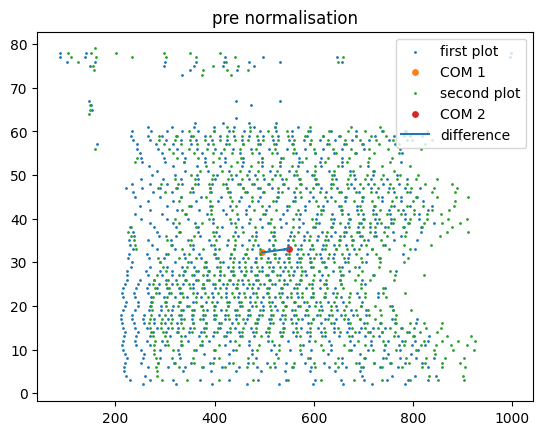

 time_difference: -54, neuron_difference:  0


In [9]:
index_0 = 0
index_1 = 1

t_1 = x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_0]["t"]
x_1 = x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_0]["x"]

t_1_com = np.mean(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_0]["t"])
x_1_com = np.mean(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_0]["x"])

plt.scatter(t_1, x_1, s = 1, c = "C00", label = "first plot")

plt.scatter(t_1_com, x_1_com,
            c = "C01",
            s = 15,
            label = "COM 1")

t_2 = x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1]["t"]
x_2 = x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1]["x"]

t_2_com = np.mean(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1]["t"])
x_2_com = np.mean(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1]["x"])

plt.scatter(t_2, x_2, s = 1, c = "C02", label = "second plot")

plt.scatter(t_2_com, x_2_com,
            c = "C03",
            s = 15,
            label = "COM 2")

plt.plot([t_1_com, t_2_com], [x_1_com, x_2_com], label = "difference")
plt.legend()
plt.title("pre normalisation")
plt.show()

print(f" time_difference: {int(t_1_com - t_2_com)}, neuron_difference:  {int(x_1_com - x_2_com)}")

 time_difference: 0, neuron_difference:  0


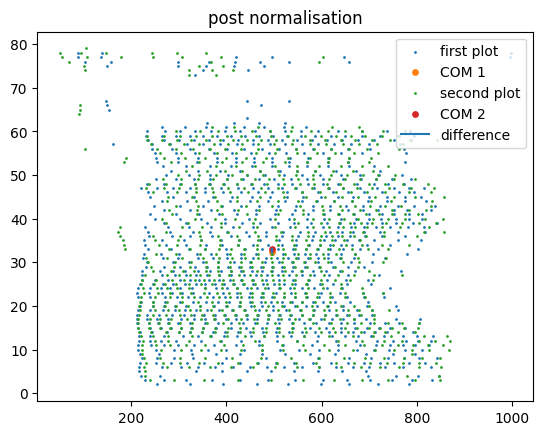

In [10]:
index_0 = 0
index_1 = 1

speaker = 1
digit = 5

t_1 = x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_0]["t"]
x_1 = x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_0]["x"]

t_1_com = np.mean(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_0]["t"])
x_1_com = np.mean(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_0]["x"])

plt.scatter(t_1, x_1, s = 1, c = "C00", label = "first plot")

plt.scatter(t_1_com, x_1_com,
            c = "C01",
            s = 15,
            label = "COM 1")

x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1]["t"] += int(t_1_com - t_2_com)

t_2_com = np.mean(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1]["t"])
x_2_com = np.mean(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1]["x"])

print(f" time_difference: {int(t_1_com - t_2_com)}, neuron_difference:  {int(x_1_com - x_2_com)}")

plt.scatter(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1]["t"], 
            x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1]["x"], 
            s = 1, 
            c = "C02", 
            label = "second plot")

plt.scatter(t_2_com, x_2_com,
            c = "C03",
            s = 15,
            label = "COM 2")

plt.plot([t_1_com, t_2_com], [x_1_com, x_2_com], label = "difference")
plt.legend()
plt.title("post normalisation")
plt.show()



In [11]:
x_train_array = x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1]

In [12]:
x_train_array = x_train_array[x_train_array["x"] >= 0]
x_train_array = x_train_array[x_train_array["x"] < 50]
x_train_array = x_train_array[x_train_array["t"] >= 0]
x_train_array = x_train_array[x_train_array["t"] < 1600]


In [13]:
x_train_array

array([(37, 172, 1), (36, 177, 1), (38, 178, 1), (35, 183, 1),
       (34, 186, 1), (33, 188, 1), (16, 214, 1), (15, 215, 1),
       (17, 215, 1), (14, 218, 1), (18, 218, 1), (20, 218, 1),
       (19, 219, 1), (21, 220, 1), (13, 221, 1), (22, 222, 1),
       (25, 222, 1), ( 9, 223, 1), (10, 223, 1), (11, 224, 1),
       (26, 224, 1), (12, 225, 1), (24, 225, 1), ( 6, 227, 1),
       ( 8, 227, 1), (23, 227, 1), ( 4, 229, 1), ( 5, 229, 1),
       (27, 229, 1), ( 7, 232, 1), (31, 232, 1), (47, 232, 1),
       (30, 235, 1), (16, 237, 1), (48, 237, 1), (15, 238, 1),
       (17, 239, 1), ( 3, 240, 1), (14, 242, 1), (29, 242, 1),
       (13, 246, 1), (18, 246, 1), (21, 246, 1), (46, 246, 1),
       (20, 247, 1), (28, 247, 1), (36, 247, 1), (25, 248, 1),
       (12, 250, 1), (22, 250, 1), (35, 250, 1), (19, 251, 1),
       (11, 252, 1), (26, 252, 1), (32, 252, 1), (24, 254, 1),
       (23, 257, 1), (16, 258, 1), (34, 258, 1), (17, 260, 1),
       ( 8, 261, 1), (15, 261, 1), (10, 263, 1), (40, 2

In [14]:
x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1][x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1]["x"] < 50]

array([(37, 172, 1), (36, 177, 1), (38, 178, 1), (35, 183, 1),
       (34, 186, 1), (33, 188, 1), (16, 214, 1), (15, 215, 1),
       (17, 215, 1), (14, 218, 1), (18, 218, 1), (20, 218, 1),
       (19, 219, 1), (21, 220, 1), (13, 221, 1), (22, 222, 1),
       (25, 222, 1), ( 9, 223, 1), (10, 223, 1), (11, 224, 1),
       (26, 224, 1), (12, 225, 1), (24, 225, 1), ( 6, 227, 1),
       ( 8, 227, 1), (23, 227, 1), ( 4, 229, 1), ( 5, 229, 1),
       (27, 229, 1), ( 7, 232, 1), (31, 232, 1), (47, 232, 1),
       (30, 235, 1), (16, 237, 1), (48, 237, 1), (15, 238, 1),
       (17, 239, 1), ( 3, 240, 1), (14, 242, 1), (29, 242, 1),
       (13, 246, 1), (18, 246, 1), (21, 246, 1), (46, 246, 1),
       (20, 247, 1), (28, 247, 1), (36, 247, 1), (25, 248, 1),
       (12, 250, 1), (22, 250, 1), (35, 250, 1), (19, 251, 1),
       (11, 252, 1), (26, 252, 1), (32, 252, 1), (24, 254, 1),
       (23, 257, 1), (16, 258, 1), (34, 258, 1), (17, 260, 1),
       ( 8, 261, 1), (15, 261, 1), (10, 263, 1), (40, 2

In [15]:
x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1][x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1]["x"] < 50]

array([(37, 172, 1), (36, 177, 1), (38, 178, 1), (35, 183, 1),
       (34, 186, 1), (33, 188, 1), (16, 214, 1), (15, 215, 1),
       (17, 215, 1), (14, 218, 1), (18, 218, 1), (20, 218, 1),
       (19, 219, 1), (21, 220, 1), (13, 221, 1), (22, 222, 1),
       (25, 222, 1), ( 9, 223, 1), (10, 223, 1), (11, 224, 1),
       (26, 224, 1), (12, 225, 1), (24, 225, 1), ( 6, 227, 1),
       ( 8, 227, 1), (23, 227, 1), ( 4, 229, 1), ( 5, 229, 1),
       (27, 229, 1), ( 7, 232, 1), (31, 232, 1), (47, 232, 1),
       (30, 235, 1), (16, 237, 1), (48, 237, 1), (15, 238, 1),
       (17, 239, 1), ( 3, 240, 1), (14, 242, 1), (29, 242, 1),
       (13, 246, 1), (18, 246, 1), (21, 246, 1), (46, 246, 1),
       (20, 247, 1), (28, 247, 1), (36, 247, 1), (25, 248, 1),
       (12, 250, 1), (22, 250, 1), (35, 250, 1), (19, 251, 1),
       (11, 252, 1), (26, 252, 1), (32, 252, 1), (24, 254, 1),
       (23, 257, 1), (16, 258, 1), (34, 258, 1), (17, 260, 1),
       ( 8, 261, 1), (15, 261, 1), (10, 263, 1), (40, 2

In [ ]:
# iterate through all digits of speaker x, and get COM

def get_com_for_speaker_digit(speaker, digit, 
                              x_train = x_train, 
                              y_train = y_train,
                              x_lim = 80,
                              t_lim = 1600):

    # get COM of each digit spoken by speaker
    t_com_across_speaker_digit, x_com_across_speaker_digit = [], []

    for index in range(y_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)].shape[0]):

        t_com = np.mean(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]["t"])
        x_com = np.mean(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]["x"])

        t_com_across_speaker_digit.append(t_com)
        x_com_across_speaker_digit.append(x_com)
        
    #print(f" mean COM for t : {int(np.mean(t_com_across_speaker_digit))}")
    #print(f" mean COM for x : {int(np.mean(x_com_across_speaker_digit))}")
    
    # shift on both x and t
    for index in range(y_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)].shape[0]):
        x_train_array = x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]
        
        x_train_array["t"] += int(np.mean(t_com_across_speaker_digit)) - int(t_com_across_speaker_digit[index])
        x_train_array["t"] += int(np.mean(x_com_across_speaker_digit)) - int(x_com_across_speaker_digit[index])
        
        x_train_array = x_train_array[x_train_array["x"] >= 0]
        x_train_array = x_train_array[x_train_array["x"] < x_lim]
        x_train_array = x_train_array[x_train_array["t"] >= 0]
        x_train_array = x_train_array[x_train_array["t"] < t_lim]

get_com_for_speaker_digit(speaker = 1,
                          digit = 5)

 mean COM for t : 557
 mean COM for x : 36


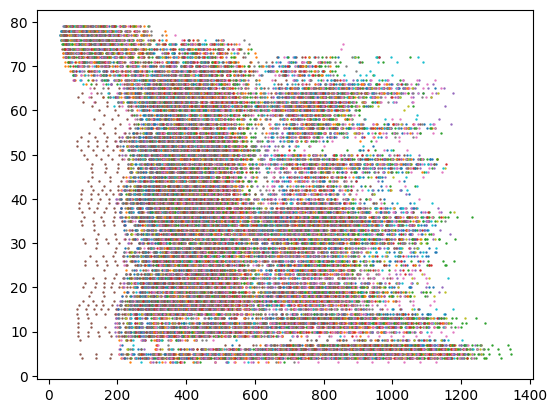

In [17]:
speaker = 3
digit = 7

t_com_across_speaker_digit, x_com_across_speaker_digit = [], []

for index in range(y_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)].shape[0]):

    t_com = np.mean(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]["t"])
    x_com = np.mean(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]["x"])

    t_com_across_speaker_digit.append(t_com)
    x_com_across_speaker_digit.append(x_com)
    
    plt.scatter(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]["t"],
                x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]["x"],
                s = 0.5)
    
print(f" mean COM for t : {int(np.mean(t_com_across_speaker_digit))}")
print(f" mean COM for x : {int(np.mean(x_com_across_speaker_digit))}")

In [18]:
# normalise all data

for speaker in np.unique(speakers_list):
    for digit in np.unique(y_train):
        get_com_for_speaker_digit(speaker,
                                  digit)

In [19]:
# get average digits

average_speaker_digit = [[] for _ in range(max(speakers_list) + 1)]
average_count_speaker_digit = [[] for _ in range(max(speakers_list) + 1)]

for speaker in np.unique(speakers_list):
    average_digit = [[] for _ in range(len(np.unique(y_train)))]
    average_count_digit = [[] for _ in range(len(np.unique(y_train)))]
    
    for digit in np.unique(y_train):
        x, t = [], []

        for index in range(y_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)].shape[0]): 
            # iterating through all digit examples for specified speaker
            t += list(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]["t"])
            x += list(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index]["x"])

        # Create the structured array
        spike_data = np.zeros(len(t), dtype=[('x', 'i1'), ('t', '<i2'), ('p', 'i1')])

        # Populate the structured array
        spike_data['t'] = np.array(t)[np.argsort(t)]
        spike_data['x'] = np.array(x)[np.argsort(t)]
        spike_data['p'] = 1
        
        average_digit[digit] = spike_data
        average_count_digit[digit] = y_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)].shape[0]
    
    average_speaker_digit[speaker] = average_digit
    average_count_speaker_digit[speaker] = average_count_digit

In [31]:
average_speaker_digit[5][0]

IndexError: list index out of range

In [32]:
average_count_speaker_digit[5][0]

IndexError: list index out of range

In [21]:
def exponential_kernel_2d(size_t, size_x, tau_t, tau_x):
    t = np.linspace(-size_t/2, size_t/2, size_t + 1, dtype='int8')
    x = np.linspace(-size_x/2, size_x/2, size_x + 1, dtype = 'int8')
    
    T, X = np.meshgrid(t, x, indexing='ij')
    
    kernel = np.exp(-np.abs(T) / tau_t) * np.exp(-np.abs(X) / tau_x)
    
    # 3D Surface plot
    fig = plt.figure(figsize=(12, 5))
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(T, X, kernel, cmap='viridis', edgecolor='none')
    ax2.set_title("3D Surface Plot of Kernel")

    plt.show() 
    
    return kernel / np.sum(kernel)  # Normalize kernel

def gaussian_kernel_2d(size_t, size_x, sigma_t = 10, sigma_x = 10, display = False):

    t = np.arange(-size_t // 2, size_t // 2 + 1)
    x = np.arange(-size_x // 2, size_x // 2 + 1)

    T, X = np.meshgrid(t, x, indexing='ij')

    kernel = np.exp(-((T**2) / (2 * sigma_t**2) + (X**2) / (2 * sigma_x**2)))
    kernel /= np.sum(kernel)

    if display:
        # Plot kernel
        fig = plt.figure(figsize=(6, 5))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(T, X, kernel, cmap='viridis', edgecolor='none')
        ax.set_title("3D Surface Plot of Gaussian Kernel")
        
        plt.show()
    
    return kernel

def get_vr_distance_2d(spike_train1, 
                       spike_train2, 
                       tau_t = 40, 
                       tau_x = 5,
                       size_t = 40,
                       size_x = 10, 
                       last_spike_t = 1700, 
                       num_neurons = 80,
                       display = False,
                       second_kernel_scale = 1.0):
    
    time_bins = np.arange(0, last_spike_t + 1, 1)  # 1 ms bins
    spike_matrix1 = np.zeros((len(time_bins), num_neurons))
    spike_matrix2 = np.zeros((len(time_bins), num_neurons))

    for t, x in zip(spike_train1['t'], spike_train1['x']):
        spike_matrix1[int(t), int(x)] = 1
    for t, x in zip(spike_train2['t'], spike_train2['x']):
        spike_matrix2[int(t), int(x)] = 1
    
    #kernel = exponential_kernel_2d(size_t = size_t, size_x = size_x, tau_t=tau_t, tau_x=tau_x)
    kernel = gaussian_kernel_2d(size_t = size_t, size_x = size_x, sigma_x = tau_x, sigma_t = tau_t, display = display)
    
    smoothed1 = convolve2d(spike_matrix1, kernel, mode='same', boundary='wrap')
    smoothed2 = convolve2d(spike_matrix2, kernel * second_kernel_scale, mode='same', boundary='wrap')
    
    # Compute Euclidean distance between smoothed spike matrices
    distance = np.linalg.norm(smoothed1 - smoothed2)
    
    return distance, smoothed1, kernel

In [22]:
a = 70
b = 60

print(a / b)
print(a, b * (a / b))

1.1666666666666667
70 70.0


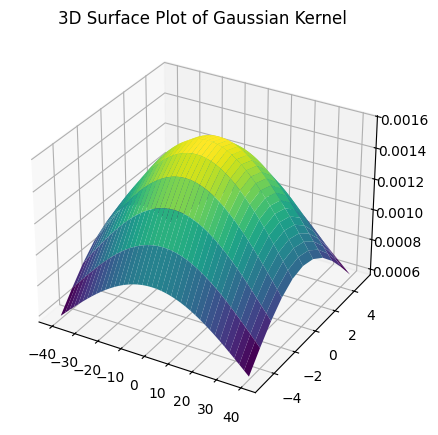

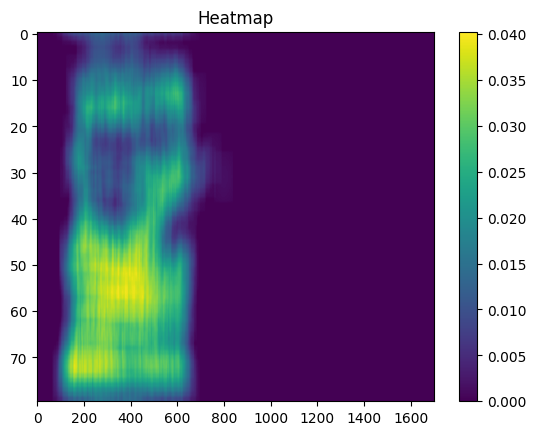

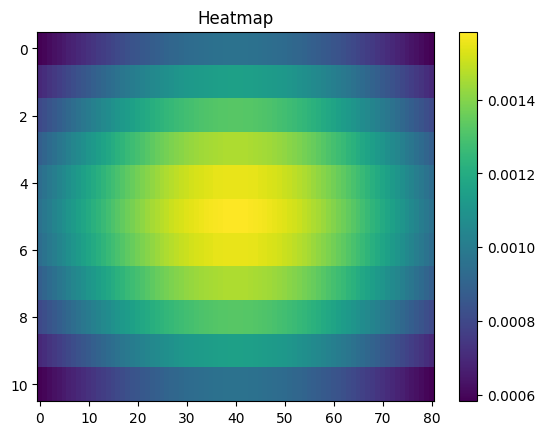

In [23]:
s = 1
d = 0
index_0 = 0
index_1 = 1

distance, smoothed1, kernel = get_vr_distance_2d(x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_0],
                                                 x_train[np.where(speakers_list == speaker)][np.where(y_train[np.where(speakers_list == speaker)] == digit)][index_1],
                                                 display = True,
                                                 size_t = 80)

plt.imshow(np.flip(np.swapaxes(smoothed1, 1, 0), 0), aspect = 'auto')
plt.colorbar()
plt.title('Heatmap')
plt.show()

plt.imshow(np.flip(np.swapaxes(kernel, 1, 0), 0), aspect = 'auto')
plt.colorbar()
plt.title('Heatmap')
plt.show()

In [24]:
a = 70
b = 60

print(a / b)
print(a, b * (a / b))

1.1666666666666667
70 70.0


In [34]:
average_count_speaker_digit[unique_speaker_list[speaker_1]][digit_1]

45

In [ ]:
vr_distance_speaker_digit = np.zeros((20 * 10, 20 * 10))

unique_speaker_list = np.unique(speakers_list)
unique_digit_list = np.unique(y_train)

for speaker_1 in trange(len(unique_speaker_list)):
    for speaker_2 in range(len(unique_speaker_list)):
        for digit_1 in range(len(unique_digit_list)):
            for digit_2 in range(len(unique_digit_list)):
                print((speaker_1 * 20) + digit_1, (speaker_2 * 20) + digit_2)
                
                second_kernel_scale = average_count_speaker_digit[unique_speaker_list[speaker_1]][digit_1] / average_count_speaker_digit[unique_speaker_list[speaker_2]][digit_2]
                
                distance, S, _ = get_vr_distance_2d(average_speaker_digit[unique_speaker_list[speaker_1]][digit_1],
                                                    average_speaker_digit[unique_speaker_list[speaker_2]][digit_2],
                                                    display = False,
                                                    size_t = 80,
                                                    second_kernel_scale = second_kernel_scale)

                vr_distance_speaker_digit[(speaker_1 * 20) + digit_1, (speaker_2 * 20) + digit_2] = distance
            break
        break
    break

  0%|          | 0/10 [00:00<?, ?it/s]

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19


  0%|          | 0/10 [00:05<?, ?it/s]


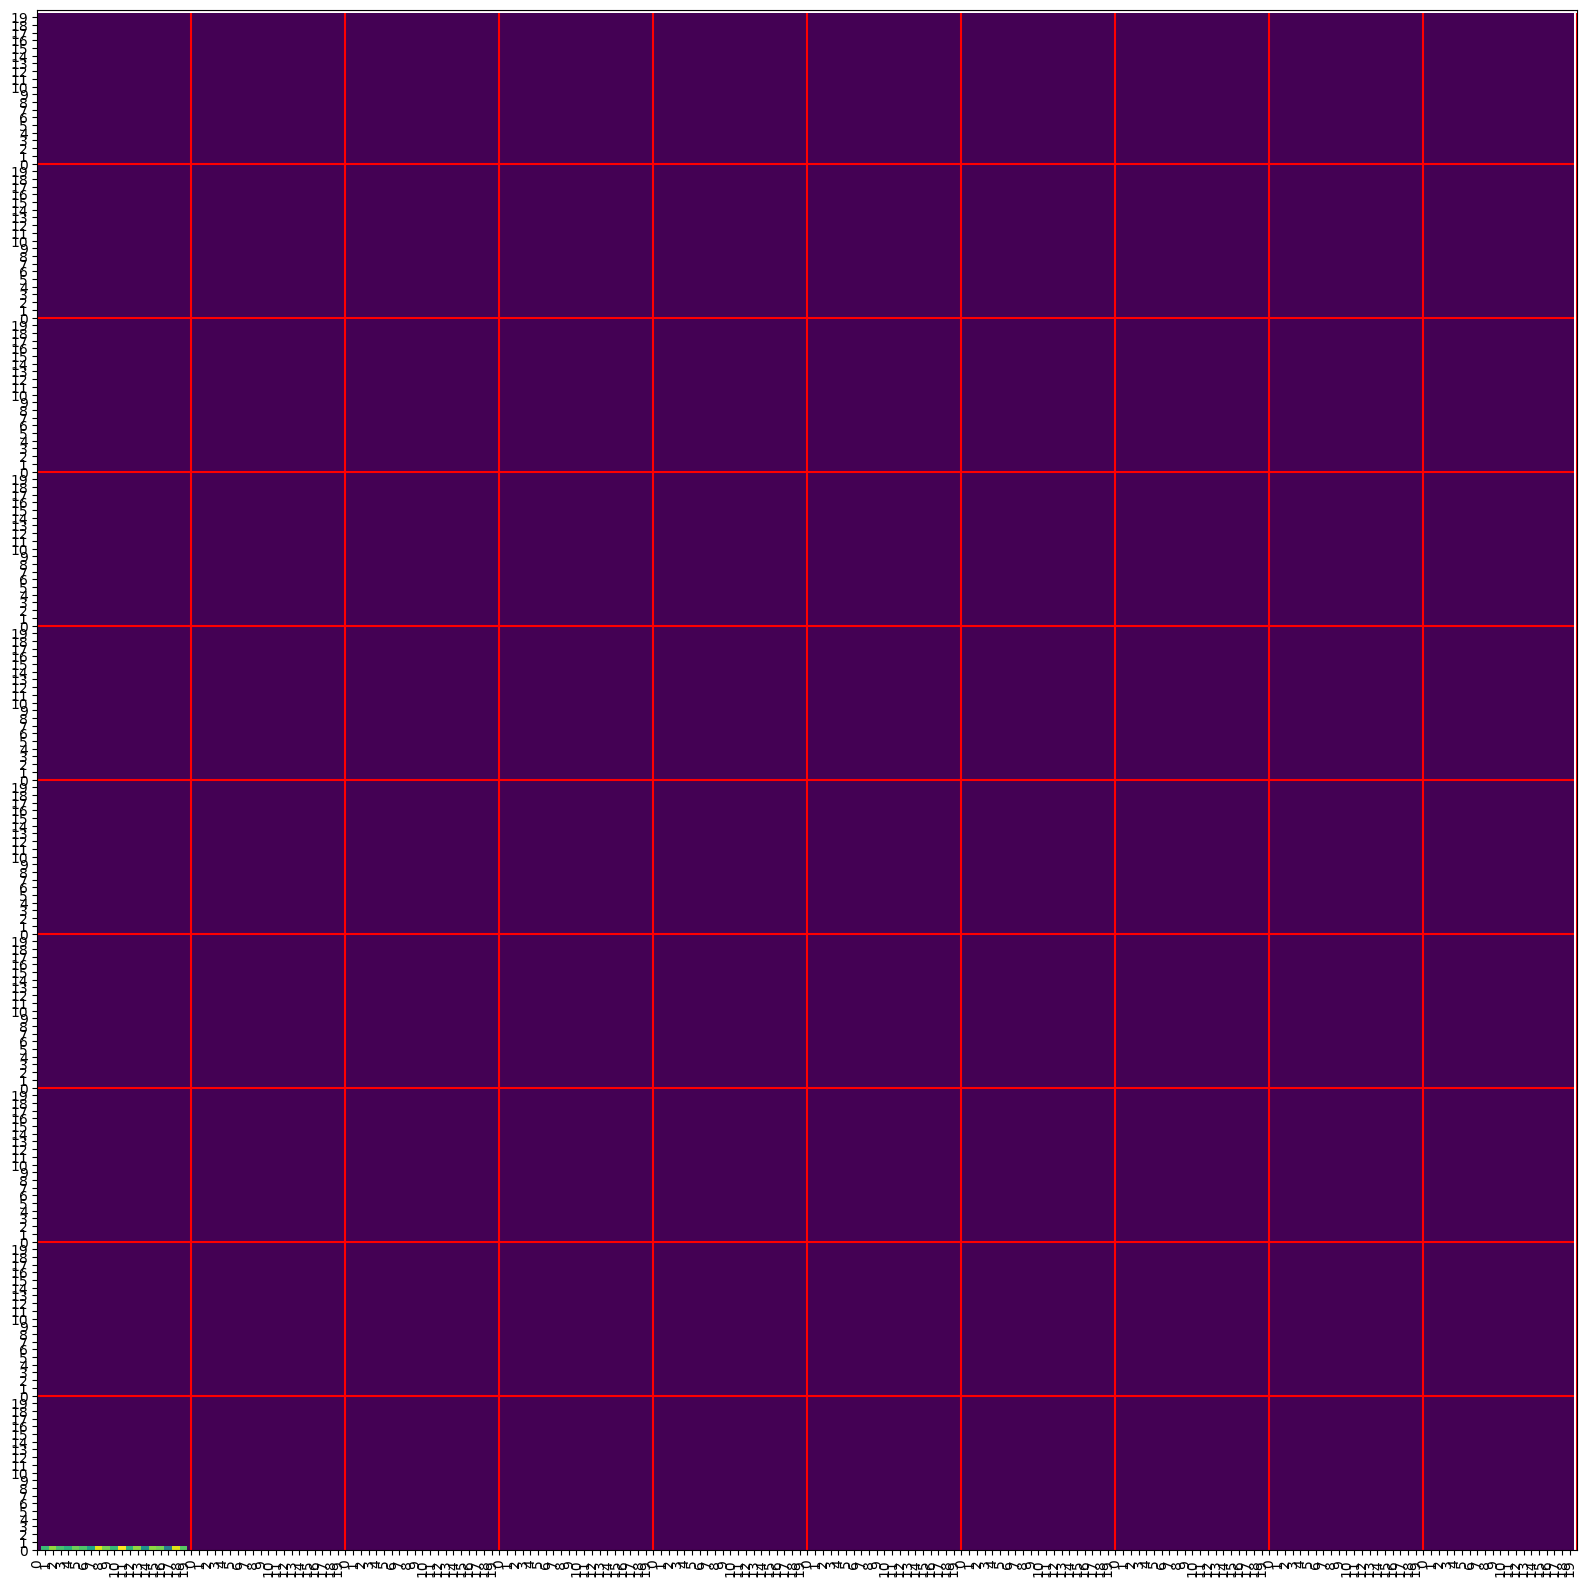

In [26]:
plt.figure(figsize=(20, 20), dpi=100)

plt.imshow(vr_distance_speaker_digit)
plt.xticks(range(200), np.tile(np.array(list(range(20))), 10), rotation = 90)
plt.yticks(range(200), np.tile(np.array(list(range(20))), 10), rotation = 0)

plt.vlines([(20 * _) + 20 for _ in range(10)], -0.5, 199.5, colors = ("r"),
         linestyles = ("solid"))

plt.hlines([(20 * _) + 20 for _ in range(10)], -0.5, 199.5, colors = ("r"),
         linestyles = ("solid"))

plt.ylim(0, 200)
plt.xlim(0, 200)
plt.show()

In [27]:
#np.save("vr_distance_speaker_digit.npy", vr_distance_speaker_digit)